##Student Performance Prediction

This project predicts student academic performance based on demographic and academic features using supervised machine learning.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score, ConfusionMatrixDisplay

In [110]:
df = pd.read_csv("student_performance_updated_1000.csv")
print(df.shape)
print(df)

(1000, 12)
     StudentID            Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1.0            John    Male            85.0               15.0   
1          2.0           Sarah  Female            90.0               20.0   
2          3.0            Alex    Male            78.0               10.0   
3          4.0         Michael    Male            92.0               25.0   
4          5.0            Emma  Female             NaN               18.0   
..         ...             ...     ...             ...                ...   
995        NaN  Kenneth Murray    Male            85.0               20.0   
996     4497.0       Amy Stout  Female            91.0                NaN   
997     1886.0             NaN    Male            85.0                8.0   
998     7636.0  Joseph Sherman    Male            88.0               17.0   
999     8021.0     Maria Walls  Female            88.0               10.0   

     PreviousGrade  ExtracurricularActivities ParentalSupport  F

In [111]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [112]:
missing = df.isna().sum()
print(missing)
print(df.shape)

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64
(1000, 12)


In [113]:
df.drop(["StudentID","Name",'StudyHoursPerWeek', 'AttendanceRate'],axis=1,inplace=True)
df.head()

,Gender,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,Male,78.0,1.0,High,80.0,4.8,59.0,False
1,Female,85.0,2.0,Medium,87.0,2.2,70.0,True
2,Male,65.0,0.0,Low,68.0,4.6,92.0,False
3,Male,90.0,3.0,High,92.0,2.9,96.0,False
4,Female,82.0,2.0,Medium,85.0,4.1,97.0,True


In [114]:
missing = df.isna().sum()
print(missing)
print(df.shape)

Gender                       48
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64
(1000, 8)


In [115]:
df.dropna(subset=["FinalGrade"],inplace=True)
num_cols=df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

/tmp/ipython-input-1192564137.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


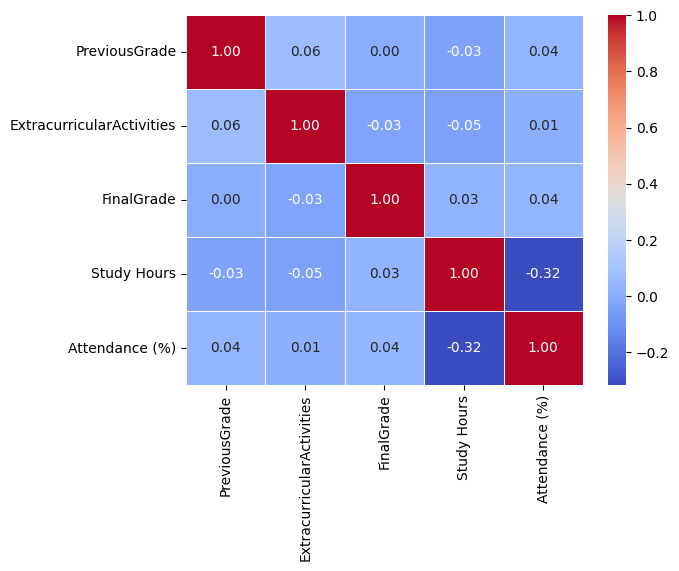

In [118]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.show()

In [119]:
df['GradeCategory'] = pd.cut(
    df['FinalGrade'],
    bins=[0, 55, 70, 100],
    labels=['Low', 'Medium', 'High']
)

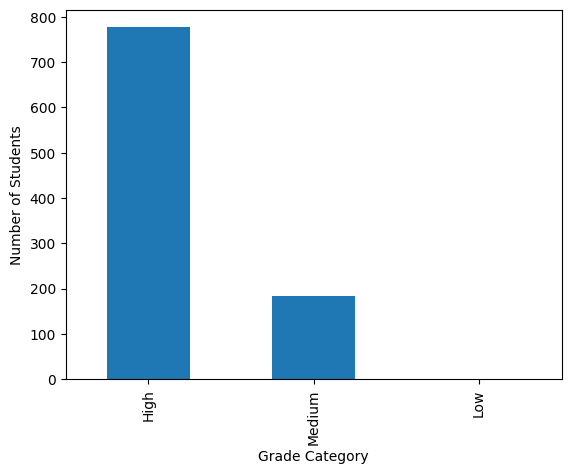

In [120]:
df['GradeCategory'].value_counts().plot(kind='bar')
plt.xlabel("Grade Category")
plt.ylabel("Number of Students")
plt.show()

In [121]:
df.drop(columns=['FinalGrade'], inplace=True)

In [122]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     960 non-null    object  
 1   PreviousGrade              960 non-null    float64 
 2   ExtracurricularActivities  960 non-null    float64 
 3   ParentalSupport            960 non-null    object  
 4   Study Hours                960 non-null    float64 
 5   Attendance (%)             960 non-null    float64 
 6   Online Classes Taken       960 non-null    bool    
 7   GradeCategory              960 non-null    category
dtypes: bool(1), category(1), float64(4), object(2)
memory usage: 54.5+ KB
None
       PreviousGrade  ExtracurricularActivities  Study Hours  Attendance (%)
count     960.000000                 960.000000   960.000000      960.000000
mean       77.621875                   1.494792     2.399896       77.278125
std         9.814427

In [123]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [124]:
X = df.drop(columns=['GradeCategory'])
y = df['GradeCategory']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

##Random Forest Classifier

In [126]:
model = RandomForestClassifier(n_estimators=300,max_depth=10, min_samples_split=9,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=9, n_estimators=300,
                       random_state=42)

In [127]:
y_pred=model.predict(X_test)

In [128]:
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {acc*100:.3f}%")
print(f"Precision Score: {precision:.3f}")
print(f"Recall Score: {recall:.3f}")

Accuracy: 80.729%
Precision Score: 0.652
Recall Score: 0.807


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The Random Forest classifier achieved an accuracy of 80.7%, with a weighted precision of 65.2% and recall of 80.7%. A warning regarding undefined precision was observed for one class due to the absence of predicted samples for that category, indicating class imbalance and overlap among student performance groups. Despite this, the model demonstrates strong overall predictive capability.

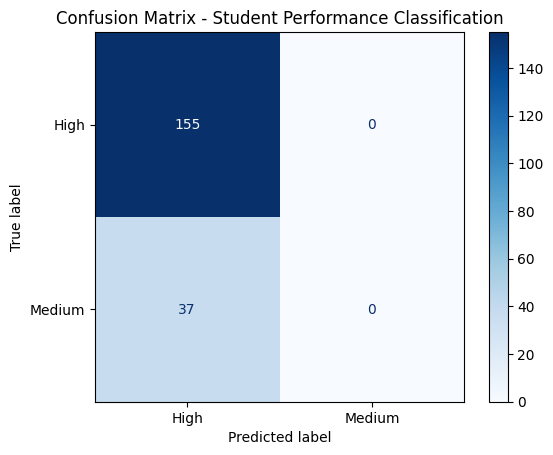

In [129]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Student Performance Classification")
plt.show()